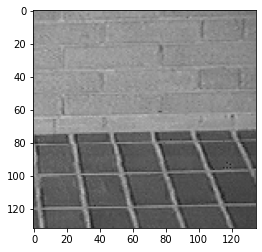

In [8]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

# 读入待处理图片
init_img = cv2.imread(r'C:\Users\CZQ\Desktop\Chapter2_1.pgm', cv2.IMREAD_COLOR)
# 显示图片
plt.imshow(init_img)

In [18]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt
from math import fabs,sin,cos,radians,log10,sqrt

init_img = cv2.imread('Chapter2_1.pgm', cv2.IMREAD_COLOR)
# 旋转度数为15度
angle = 15
# 原始图片的宽高
init_height,init_width = init_img.shape[:2]
print("原始图片宽高为(", init_height, ",", init_width, ")")

def rotate(image, angle, method):
    # 获取初始图片高和宽并显示
    height, width = image.shape[:2]
    print("图片高宽及通道数：\n", image.shape)
    
    # 获取旋转矩阵,
    # getRotationMatrix2D()函数的第一个参数为旋转中心（行，列），第二个参数为旋转角度，第三个参数为缩放比例
    rotate_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    '''
    旋转矩阵形式如下：
    [cos sin (1-cos)*center.x-center.y*sin
    -sin cos center.x*sin+(1-cos)*center.y]
    '''
    print("旋转矩阵如下：\n", rotate_matrix)
    
    # 找到包含原始图像所有像素的包围盒的宽高,加1防止边界单个像素丢失
    rotated_height = int(width * fabs(sin(radians(angle))) + height * fabs(cos(radians(angle))))+1
    rotated_width = int(height * fabs(sin(radians(angle))) + width * fabs(cos(radians(angle))))+1

    # 修改旋转矩阵
    rotate_matrix[0,2] += (rotated_width - width)/2
    rotate_matrix[1,2] += (rotated_height - height)/2

    # 旋转图像
    rotated_image = cv2.warpAffine(image, rotate_matrix, (rotated_width,rotated_height), None, method)
    return rotated_image

def recover(image, angle, method):
    # 获取初始图片高和宽并显示
    height, width = image.shape[:2]
    print("初始图片高宽及通道数：\n", image.shape)

    # 获取旋转矩阵,
    # getRotationMatrix2D()函数的第一个参数为旋转中心（行，列），第二个参数为旋转角度，第三个参数为缩放比例
    rotate_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    print("旋转矩阵如下：\n", rotate_matrix)

    # 找到包含原始图像所有像素的包围盒的宽高
    rotated_height = int(width * fabs(sin(radians(angle))) + height * fabs(cos(radians(angle))))
    rotated_width = int(height * fabs(sin(radians(angle))) + width * fabs(cos(radians(angle))))

    # 修改旋转矩阵
    rotate_matrix[0,2] += (rotated_width-width)/2
    rotate_matrix[1,2] += (rotated_height-height)/2
    
    # 旋转图像
    rotated_img = cv2.warpAffine(image,rotate_matrix,(rotated_width,rotated_height),None,method)

    # 找出图像最小包围圈
    start_width = (len(rotated_img[0]) - len(init_img[0]))>>1 
    start_height = (len(rotated_img)-len(init_img))>>1 

    return rotated_img[start_height:start_height+init_height,start_width:start_width+init_width]
    


原始图片宽高为( 132 , 135 )


图片高宽及通道数：
 (132, 135, 3)
旋转矩阵如下：
 [[  0.96592583   0.25881905 -14.78205025]
 [ -0.25881905   0.96592583  19.71918101]]


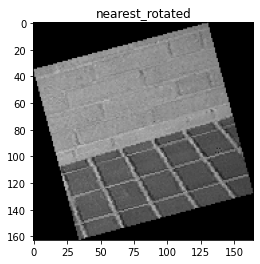

In [26]:
# 最近邻 旋转15度
rotate_img_nearest = rotate(init_img, angle,cv2.INTER_NEAREST)
plt.title("nearest_rotate")
plt.imshow(rotate_img_nearest)


图片高宽及通道数：
 (163, 165, 3)
旋转矩阵如下：
 [[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]


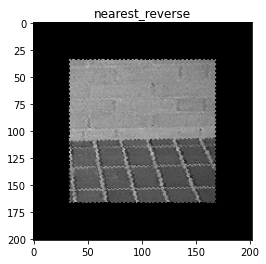

In [22]:
# 最近邻 反向旋转15度
nearest_reverse_image = rotate(rotate_img_nearest,-angle,cv2.INTER_NEAREST)
plt.title("nearest_reverse")
plt.imshow(nearest_reverse_image)

初始图片高宽及通道数：
 (163, 165, 3)
旋转矩阵如下：
 [[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]
33 34 165 163 135 132
33 34 201 200 135 132


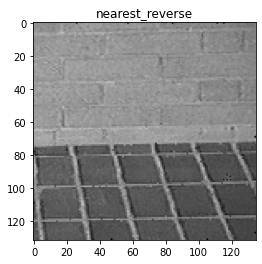

In [23]:
# 最近邻 反向旋转15度，并去黑框
recover_img_nearest = recover(rotate_img_nearest,-angle,cv2.INTER_NEAREST)
plt.title("nearest_reverse")
plt.imshow(recover_img_nearest)

图片高宽及通道数：
 (132, 135, 3)
旋转矩阵如下：
 [[  0.96592583   0.25881905 -14.78205025]
 [ -0.25881905   0.96592583  19.71918101]]


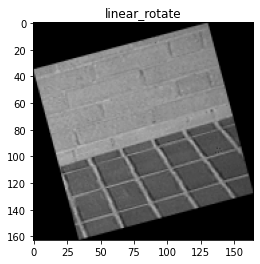

In [30]:
# 双线性 旋转15度
linear_rotate = rotate(init_img, angle, cv2.INTER_LINEAR)
plt.title("linear_rotate")
plt.imshow(linear_rotate)

初始图片高宽及通道数：
 (163, 165, 3)
旋转矩阵如下：
 [[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]
33 34 165 163 135 132
33 34 201 200 135 132


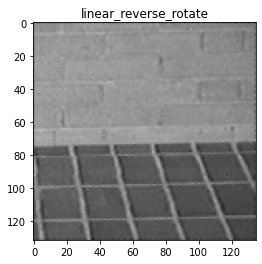

In [31]:
# 双线性 反向旋转15度
linear_reverse_rotate = recover(linear_rotate, -angle, cv2.INTER_LINEAR)
plt.title("linear_reverse_rotate")
plt.imshow(linear_reverse_rotate)

图片高宽及通道数：
 (132, 135, 3)
旋转矩阵如下：
 [[  0.96592583   0.25881905 -14.78205025]
 [ -0.25881905   0.96592583  19.71918101]]


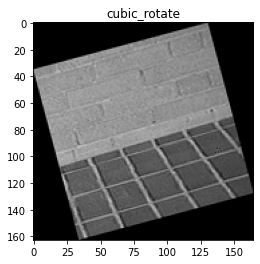

In [32]:
# 多项式 旋转15度
cubic_rotate = rotate(init_img, angle, cv2.INTER_CUBIC)
plt.title("cubic_rotate")
plt.imshow(cubic_rotate)

初始图片高宽及通道数：
 (163, 165, 3)
旋转矩阵如下：
 [[  0.96592583  -0.25881905  23.90487151]
 [  0.25881905   0.96592583 -18.57552606]]
33 34 165 163 135 132
33 34 201 200 135 132


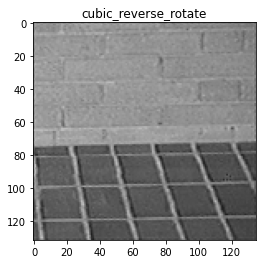

In [34]:
# 多项式 反向旋转15度
cubic_reverse_rotate = recover(cubic_rotate, -angle, cv2.INTER_CUBIC)
plt.title("cubic_reverse_rotate")
plt.imshow(cubic_reverse_rotate)

In [ ]:
# True:尺寸变了,False尺寸没变
def is_size_change(img,changed):
    assert img.shape[:2] == changed.shape[:2]
    return False
print(is_size_change(init_img,nearest_reverse_image))
print(is_size_change(init_img,linear_reverse_rotate))
print(is_size_change(init_img,cubic_reverse_rotate))

In [27]:
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

# 计算灰度误差绝对值的最大值、均值、中值
def get_analysis(init_img, change_img):
    (height, width) = init_img.shape[:2]
    (height_change, width_change) = change_img.shape[:2]
    
    init = np.array(init_img, dtype=np.float64)
    change = np.array(change_img, dtype=np.float64)
    
    # 灰度误差
    diff = init - change
    # 灰度误差绝对值的最大值
    max = np.max(diff)
    # 灰度误差绝对值的平均值
    mean = diff.mean()
    # 灰度误差绝对值的中值
    median = np.median(diff)
    # PSNR峰值信噪比
    psnr = compare_psnr(init_img, change_img)
    # SSIM结构相似性
    ssim = compare_ssim(init_img, change_img)
    
    print('灰度误差绝对值的最大值:',max)
    print('灰度误差绝对值的平均值:',mean)
    print('灰度误差绝对值的中值:',median)
    print("峰值信噪比PSNR:",psnr)
    print("结构相似性SSIM:",ssim)